# PART A

In [104]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn import metrics


# 1. Data understanding


### A. Reading all the 3 CSV files as DataFrame and store them into 3 separate variables. 

In [57]:
normal_df = pd.read_csv("Normal.csv")
typeH_df = pd.read_csv("Type_H.csv")
typeS_df = pd.read_csv("Type_S.csv")

###  B. Printing Shape and columns of three dataframes starting with normal_df

In [4]:
normal_df.shape

(100, 7)

In [5]:
normal_df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


####  Printing Shape and columns of typeH_df

In [7]:
typeH_df.shape

(60, 7)

In [94]:
typeH_df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


####  Printing Shape and columns of typeS_df

In [8]:
typeS_df.shape

(150, 7)

In [9]:
typeS_df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


### C. Comparing the column names of three dataframes

In [10]:
print("All the three dataframes have same number of columns and column names.")

All the three dataframes have same number of columns and column names.



### D. Printing datatypes of three dataframes starting with normal_df

In [11]:
normal_df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


####  Printing datatypes of typeH_df

In [99]:
typeH_df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


####  Printing datatypes of typeS_df

In [100]:

typeS_df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


### E. Observe and share variation in ‘Class’ feature of all the 3 DataFrames

In [36]:
normal_df['Class'].unique()
normal_df['Class'].value_counts()


Normal    73
Nrmal     27
Name: Class, dtype: int64

In [37]:
typeH_df['Class'].unique()
typeH_df['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [38]:
typeS_df['Class'].unique()
typeS_df['Class'].unique()

array(['Type_S', 'tp_s'], dtype=object)

In [ ]:
### "We can notice that in all three dataframes class labels are differing by string case used. 
###  A few records are 'Normal' and others are 'Nrmal'  for normal_df
###  A few records are 'Type_H' and others are 'type_h'  for typeH_df
###  A few records are 'Type_S' and others are 'tp_s'  for typeS_df
    

# 2. Data Preparation and Exploration



### A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames
changing class_variables to Normal,type_h,type_s

In [63]:
normal_df['Class'] = normal_df['Class'].replace(['Nrmal','Normal'],'normal')
typeH_df['Class'] = typeH_df['Class'].replace(['Type_H'],'type_h')
typeS_df['Class'] = typeS_df['Class'].replace(['Type_S','tp_s'],'type_s')


### B. Combine all the 3 DataFrames to form a single DataFrame 


In [64]:
frames = [normal_df, typeH_df, typeS_df]
Consolidated_frame_df = pd.concat(frames)
Consolidated_frame_df.shape
Consolidated_frame_df['Class'].unique()

array(['normal', 'type_h', 'type_s'], dtype=object)


### C. Print 5 random samples of this DataFrame


In [41]:
Consolidated_frame_df.sample(n = 5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
61,42.515610,16.541216,42.000000,25.974394,120.631941,7.876731,Normal
60,51.311771,8.875541,57.000000,42.436230,126.472258,-2.144044,Normal
45,50.912440,23.015169,47.000000,27.897271,117.422259,-2.526702,type_h
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,type_s
29,71.186811,23.896201,43.696665,47.290610,119.864938,27.283985,type_s



### D. Printing Feature-wise percentage of Null values.


In [15]:
percent_feature_missing = Consolidated_frame_df.isnull().sum() * 100 / len(Consolidated_frame_df)
missing_feature_value_df = pd.DataFrame({'column_name': Consolidated_frame_df.columns,
                                 'percent_missing': percent_feature_missing})
missing_feature_value_df

,column_name,percent_missing
P_incidence,P_incidence,0.0
P_tilt,P_tilt,0.0
L_angle,L_angle,0.0
S_slope,S_slope,0.0
P_radius,P_radius,0.0
S_Degree,S_Degree,0.0
Class,Class,0.0


In [45]:
print("Observation is no missing(NULL values)data.")

Observation is no missing(NULL values)data.



### E. Checking 5-point summary of the new DataFrame. 


In [46]:
Consolidated_frame_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


# 3. Data Analysis



### A. Displaying a heatmap to understand correlation between all features . 


             P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree
P_incidence     1.000000  0.629199  0.717282  0.814960 -0.247467  0.638743
P_tilt          0.629199  1.000000  0.432764  0.062345  0.032668  0.397862
L_angle         0.717282  0.432764  1.000000  0.598387 -0.080344  0.533667
S_slope         0.814960  0.062345  0.598387  1.000000 -0.342128  0.523557
P_radius       -0.247467  0.032668 -0.080344 -0.342128  1.000000 -0.026065
S_Degree        0.638743  0.397862  0.533667  0.523557 -0.026065  1.000000


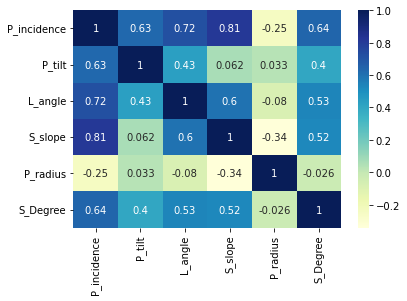

In [17]:
# printing correlation values 
print(Consolidated_frame_df.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(Consolidated_frame_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()


### B. Share insights on correlation. 
A. Features having stronger correlation with correlation value.

B. Features having weaker correlation with correlation value


In [18]:
print("Below features are strongly correlated:")
print("S_slope and P_incidence, correlation value - 0.81")
print("L_angle and P_incidence, correlation value - 0.81")
print("S_Degree and P_incidence, correlation value - 0.64")
print("P_tilt and P_incidence,correlation value - 0.63")
print("L_angle and S_slope,correlation value - 0.6")

Below features are strongly correlated:
S_slope and P_incidence
L_angle and P_incidence


In [47]:
print("Below features are weakly correlated:")
print("P_radius and P_incidence,correlation value - -0.25")
print("P_tilt and S_slope,correlation value - 0.062")
print("P_tilt and P_radius,correlation value - 0.033")
print("L-angle and P_radius,correlation value - -0.08")
print("S_slope and P_radius,correlation value - -0.34")
print("S_Degree and P_radius,correlation value - 0.026")

Below features are weakly correlated:
P_radius and P_incidence,correlation value - -0.25
P_tilt and S_slope,correlation value - 0.062
P_tilt and P_radius,correlation value - 0.033
L-angle and P_radius,correlation value - -0.08
S_slope and P_radius,correlation value - -0.34
S_Degree and P_radius,correlation value - 0.026



### C. Visualize a pairplot with 3 classes distinguished by colors and share insights. . 



In [48]:

Consolidated_frame_df.reset_index(level=0, inplace=True)


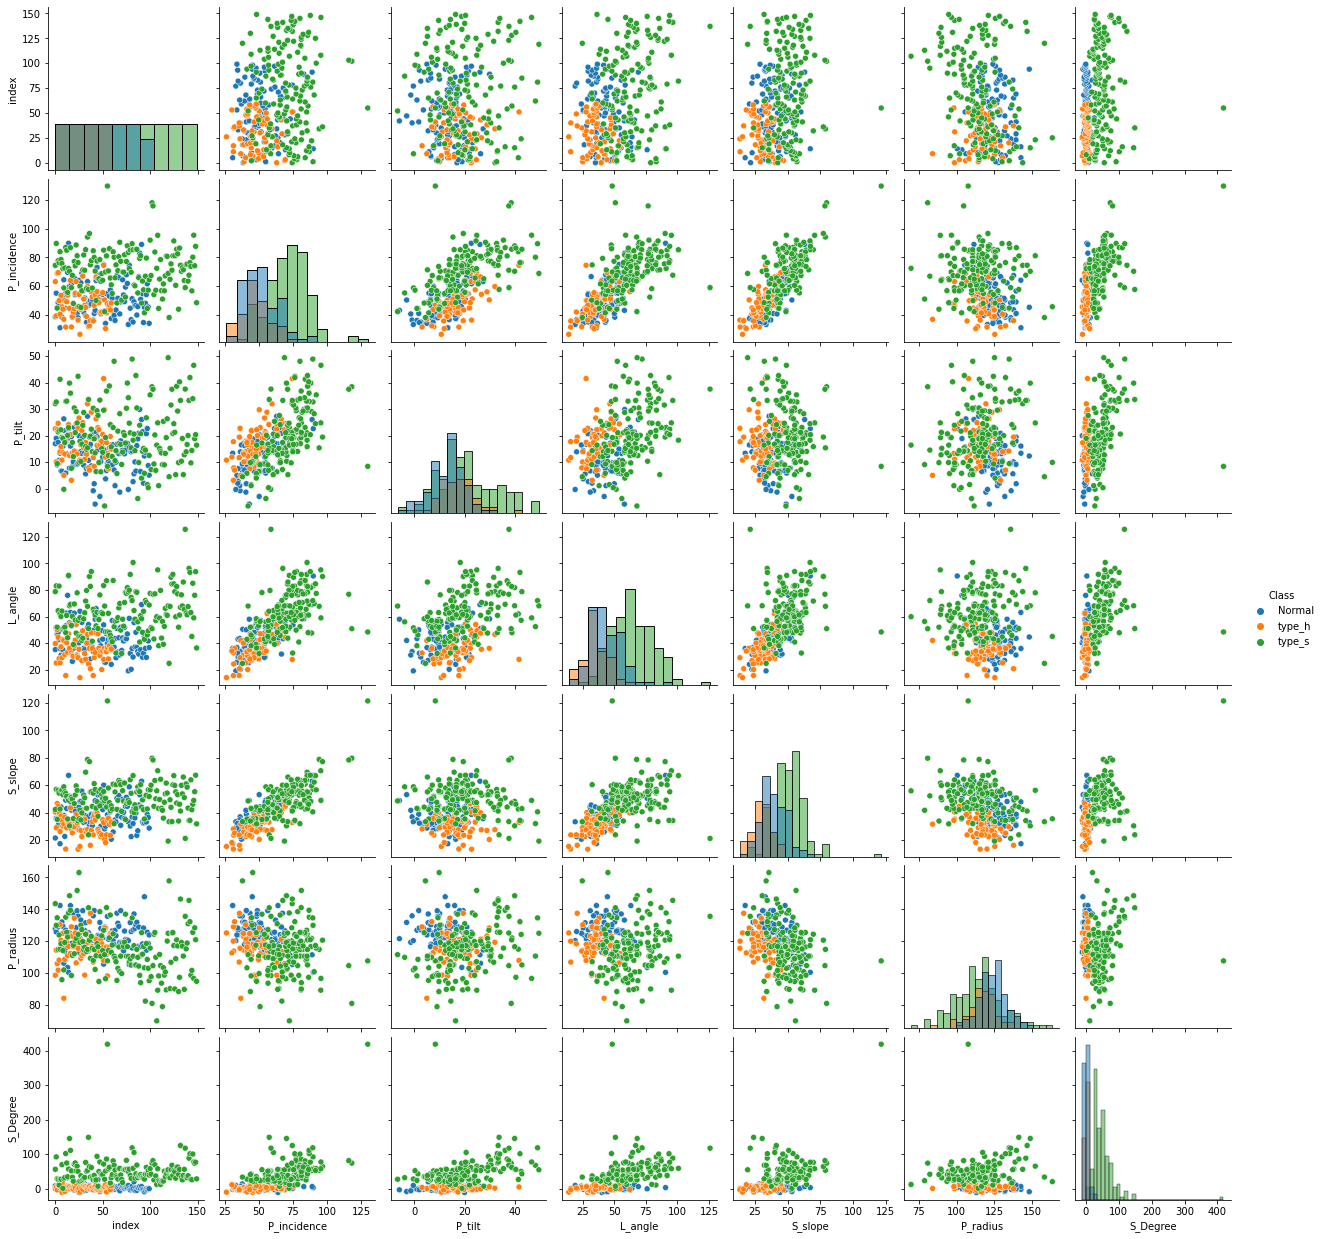

In [78]:
sns.pairplot(Consolidated_frame_df, hue="Class", diag_kind="hist")

In [52]:
print("Observations from pairplot:")
print("\t P_incidence is linearly  corelated P_tilt,L-angle,S_slope.")
print("\t L_angle is linearly  corelated S_slope.")


Observations from pairplot:
	 P_incidence is linearly  corelated P_tilt,L-angle,S_slope.
	 L_angle is linearly  corelated S_slope.



### D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.



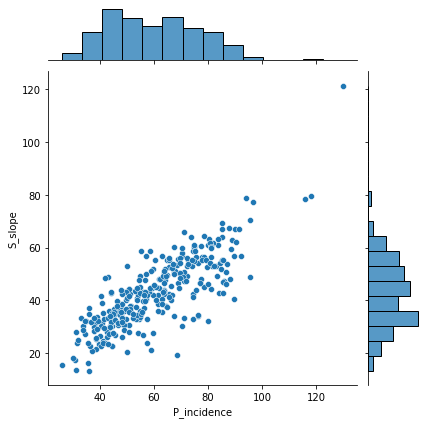

In [21]:
sns.jointplot(data=Consolidated_frame_df, x="P_incidence", y="S_slope")


In [53]:
print("P_incidence’ and ‘S_slope are highly(linearly) correlated. So we can drop one of the variables if required. ")

P_incidence’ and ‘S_slope are highly(linearly) correlated. So we can drop one of the variables if required. 



### E. Visualize a boxplot to check distribution of the features and share insights. .



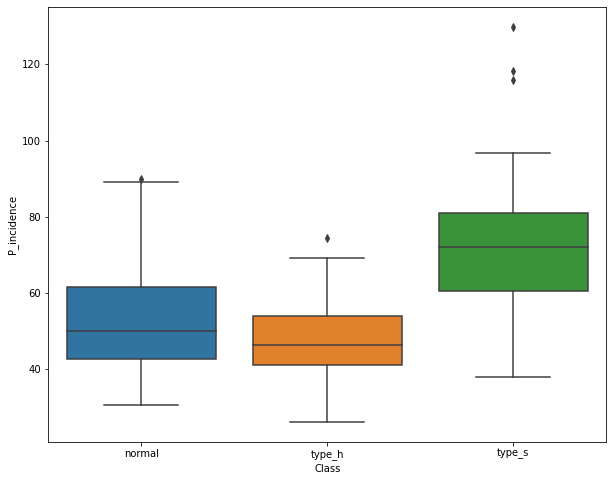

In [68]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Class", y="P_incidence",data=Consolidated_frame_df)

In [ ]:
print("Above boxplot shows,classes right skewed over P_incidence feature and there are outliers for type_s. ")

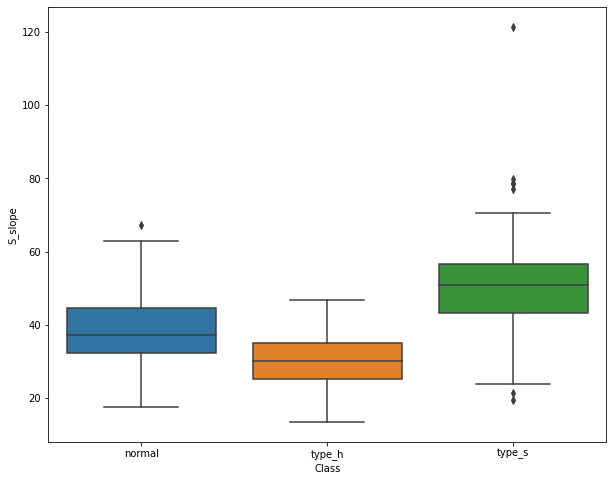

In [69]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Class", y="S_slope",data=Consolidated_frame_df)

In [ ]:
print("Above boxplot shows,classes right skewed over S_slope normal feature and there are outliers for type_s. ")

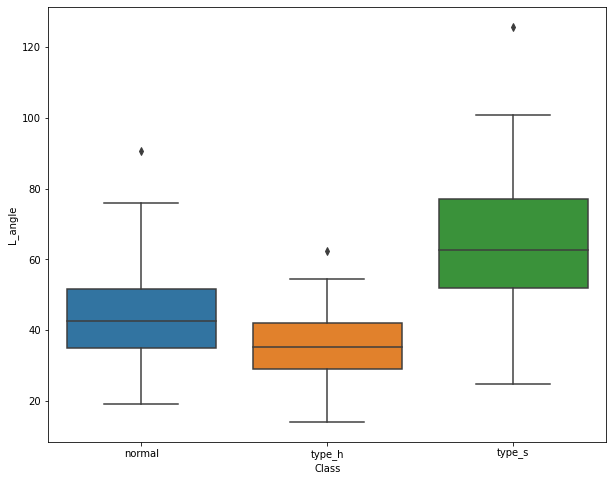

In [70]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Class", y="L_angle",data=Consolidated_frame_df)

In [73]:
print("Above boxplot shows,classes right skewed over L_angle type_s values feature and there are no outliers for type_s. ")
print("One/a few outlies for normal and type_h data values")

Above boxplot shows,classes right skewed over L_angle type_s values feature and there are no outliers for type_s. 
One/a few outlies for normal and type_h data values


# 4 . Model Building


In [ ]:

### Experiment with various parameters to improve performance of the base model. 

In [74]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = Consolidated_frame_df.drop(labels= "Class" , axis = 1)
y = Consolidated_frame_df["Class"]
X.head()


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [75]:
# convert the features into z scores 
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,1.042177e-16,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
P_tilt,310.0,2.096889e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
L_angle,310.0,1.980495e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
S_slope,310.0,2.829278e-17,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
P_radius,310.0,-5.071212e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
S_Degree,310.0,-1.277204e-16,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350


In [80]:
### B. Split data into train and test with 80:20 proportion. 

In [114]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.20, random_state=1)

# Training a KNN Model

In [132]:
NNH = KNeighborsClassifier(n_neighbors= 5, weights = 'distance' )


In [133]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

# Printing the performance of KNN Model

In [134]:
# For every test data point, predict it's label based on 5 nearest neighbours 
# The majority class is assigned to the test data point

predicted_label_values = NNH.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(predicted_label_values,y_test)

0.7258064516129032

Confusion Matrix


<AxesSubplot:>

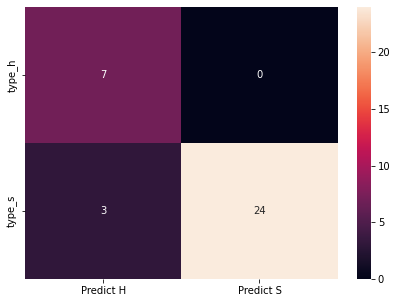

In [111]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_label_values, labels=["type_h", "type_s"])

df_cm = pd.DataFrame(cm, index = [i for i in ["type_h","type_s"]],
                  columns = [i for i in ["Predict H","Predict S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [87]:
print(classification_report(y_test,predicted_label_values))

              precision    recall  f1-score   support

      normal       0.57      0.67      0.62        18
      type_h       0.64      0.64      0.64        11
      type_s       0.87      0.79      0.83        33

    accuracy                           0.73        62
   macro avg       0.69      0.70      0.69        62
weighted avg       0.74      0.73      0.73        62



In [88]:
print("This model has better precision,recall and f1 score for when the class is type_s.")

This model has better precision,recall and f1 score for when the class is type_s.


# 5. Performance Improvement


In [ ]:
### A. Experiment with various parameters to improve performance of the base model. 

In [90]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
# fit the model on our train set
g_res = gs.fit(X_train, y_train)
# find the best score
g_res.best_score_
g_res.best_params_


Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
### B. Clearly showcase improvement in performance achieved. 

In [126]:
# use the best hyperparameters
NHH = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform',algorithm = 'brute',metric = 'manhattan')
NHH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=15)

In [135]:
# get a prediction
y_tra = NHH.predict(X_train)
y_knn = NHH.predict(X_test)

print('Test set accuracy: ',accuracy_score(y_test, y_knn))

print(confusion_matrix(y_test, y_knn))

print(classification_report(y_test, y_knn))

Test set accuracy:  0.7419354838709677
[[12  2  4]
 [ 3  8  0]
 [ 5  2 26]]
              precision    recall  f1-score   support

      normal       0.60      0.67      0.63        18
      type_h       0.67      0.73      0.70        11
      type_s       0.87      0.79      0.83        33

    accuracy                           0.74        62
   macro avg       0.71      0.73      0.72        62
weighted avg       0.75      0.74      0.75        62



In [138]:
### Clearly state which parameters contributed most to improve model performance. 
print("We tuned the below hyperparameters to achieve the 74% accuracy from 72% in the base model ")
print("1.n_neighbors = 15")
print("2. weights = 'uniform'")
print("3.algorithm = 'brute'")
print("4. metric = 'manhattan'")

We tuned the below hyperparameters to achieve the 74% accuracy from 72% in the base model 
1.n_neighbors = 15
2. weights = 'uniform'
3.algorithm = 'brute'
4. metric = 'manhattan'


# PART B

# 1. Data understanding


### A. Reading all the 2 CSV files as DataFrame and store them into 2 separate variables. 

In [161]:
data1_df = pd.read_csv("Data1.csv")
data2_df = pd.read_csv("Data2.csv")

###  B. Printing Shape,columns and datatypes of two dataframes 

In [146]:
data1_df.shape

(5000, 8)

In [5]:
data1_df.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [149]:
data1_df.dtypes
data1_df.head(10)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2
5,6,37,13,29,92121,4,0.4,2
6,7,53,27,72,91711,2,1.5,2
7,8,50,24,22,93943,1,0.3,3
8,9,35,10,81,90089,3,0.6,2
9,10,34,9,180,93023,1,8.9,3


In [6]:
data2_df.shape

(5000, 7)

In [7]:
data2_df.columns
data2_df.head(10)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN
5,6,155,0,0,1,0,NaN
6,7,0,0,0,1,0,NaN
7,8,0,0,0,0,1,NaN
8,9,104,0,0,1,0,NaN
9,10,0,0,0,0,0,1.0


In [8]:
data2_df.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

###  C. Merge both the Dataframe on ‘ID’ feature to form a single DataFrame

In [162]:

Consolidated_data_df = pd.merge(data1_df, data2_df, on=["ID"])

Consolidated_data_df.shape
Consolidated_data_df.columns
#Consolidated_data_df.dtypes

(5000, 14)

In [143]:
Consolidated_data_df.columns
Consolidated_data_df.dtypes
Consolidated_data_df.head(10)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0


###  D. . Change Datatype of below features to ‘Object’ 

In [163]:
Consolidated_data_df = Consolidated_data_df.astype({"CreditCard": object}, errors='raise') 
Consolidated_data_df = Consolidated_data_df.astype({"InternetBanking": object}, errors='raise')
Consolidated_data_df = Consolidated_data_df.astype({"FixedDepositAccount": object}, errors='raise')
Consolidated_data_df = Consolidated_data_df.astype({"Security": object}, errors='raise')
Consolidated_data_df = Consolidated_data_df.astype({"Level": object}, errors='raise')
Consolidated_data_df = Consolidated_data_df.astype({"HiddenScore": object}, errors='raise')
Consolidated_data_df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

In [151]:
Consolidated_data_df.head(10)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0


# 2. Data Exploration and Analysis:


###  A.  Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

<AxesSubplot:>

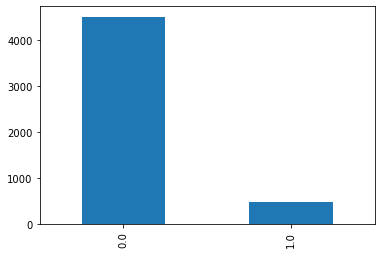

In [165]:
Consolidated_data_df['LoanOnCard'].value_counts()
Consolidated_data_df['LoanOnCard'].value_counts(normalize=True)

pd.value_counts(Consolidated_data_df["LoanOnCard"]).plot(kind="bar")

In [158]:
print("Consolidated dataset has 4500 records with LoanOnCard=0.0 and 480 records with LoanOnCard=1.0, it's a imbalanced dataset.")

Consolidated dataset has 4500 records with LoanOnCard=0.0 and 480 records with LoanOnCard=1.0, it's a imbalanced dataset.


In [227]:
Consolidated_data_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 715.0+ KB


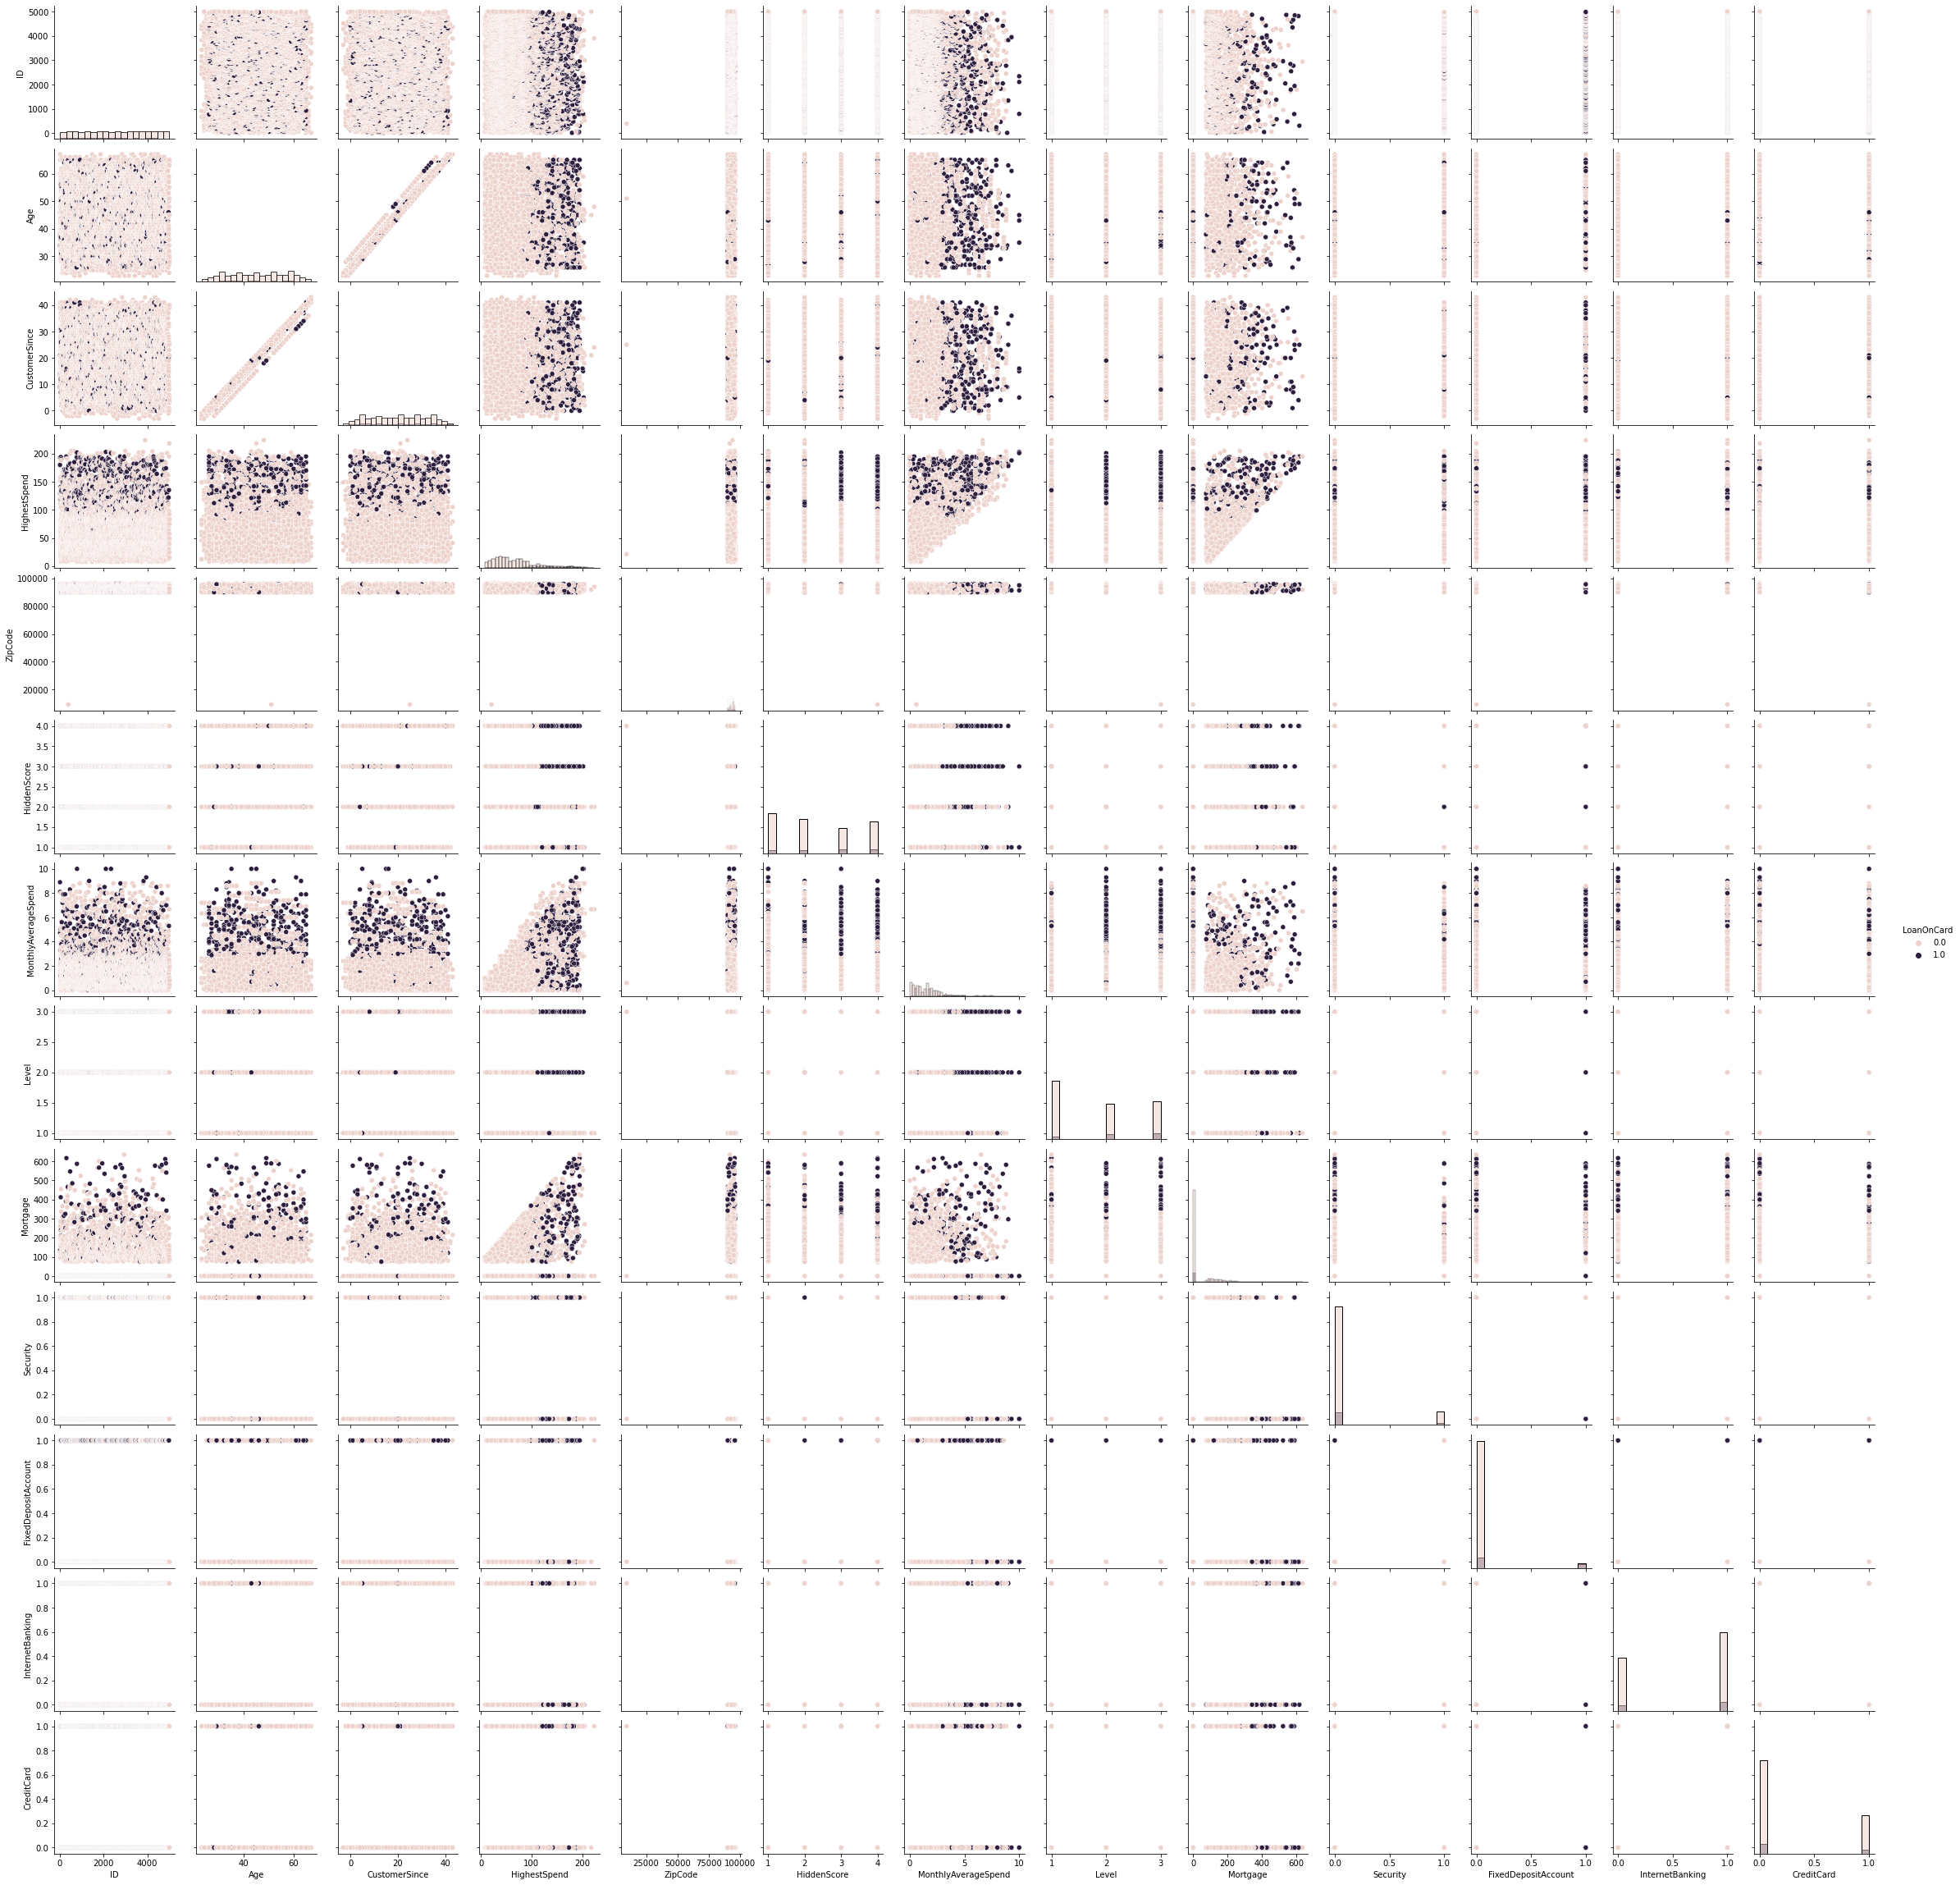

In [228]:
sns.pairplot(Consolidated_data_df, hue="LoanOnCard", diag_kind="hist")

###  B.  Check the percentage of missing values and impute/drop if required.

In [169]:

percent_feature_missing = Consolidated_data_df.isnull().sum() * 100 / len(Consolidated_data_df)
missing_data_value_df = pd.DataFrame({'column_name': Consolidated_data_df.columns,
                                 'percent_missing': percent_feature_missing})
missing_data_value_df

,column_name,percent_missing
ID,ID,0.0
Age,Age,0.0
CustomerSince,CustomerSince,0.0
HighestSpend,HighestSpend,0.0
ZipCode,ZipCode,0.0
HiddenScore,HiddenScore,0.0
MonthlyAverageSpend,MonthlyAverageSpend,0.0
Level,Level,0.0
Mortgage,Mortgage,0.0
Security,Security,0.0


In [171]:
# Since only LoanOnCard column has 0.4 missing values , we are dropping the missing value records instead of imputing.

#Consolidated_data_df.shape
Consolidated_data_df.dropna(inplace=True)
#Consolidated_data_df['LoanOnCard'].unique()
#output-----> array([1., 0.]
Consolidated_data_df.shape

(4980, 14)

###  C.  Check for unexpected values in each categorical variable and impute with best suitable value.

In [173]:
#checking for unique values in each categorial columns
#All the columns have valid values,
# No noise values like ?,1.5 etc found 

Consolidated_data_df['CreditCard'].unique()
#Output---> array([0, 1], dtype=object)
Consolidated_data_df['InternetBanking'].unique()
#Output---> array([0, 1], dtype=object)
Consolidated_data_df['FixedDepositAccount'].unique()
#Output---> array([0, 1], dtype=object)
Consolidated_data_df['Security'].unique()
#Output---> array([0, 1], dtype=object)
Consolidated_data_df['Level'].unique()
#Output---> array([1, 2, 3], dtype=object)
Consolidated_data_df['HiddenScore'].unique()
#Output---> array([4, 3, 1, 2], dtype=object)

array([1, 4, 3, 2], dtype=object)

In [232]:
Consolidated_data_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4980.0,NaN,NaN,NaN,2510.345382,1438.011129,10.0,1265.75,2510.5,3755.250,5000.0
Age,4980.0,NaN,NaN,NaN,45.352610,11.464212,23.0,35.00,45.0,55.000,67.0
CustomerSince,4980.0,NaN,NaN,NaN,20.117671,11.468716,-3.0,10.00,20.0,30.000,43.0
HighestSpend,4980.0,NaN,NaN,NaN,73.852410,46.070090,8.0,39.00,64.0,98.000,224.0
ZipCode,4980.0,NaN,NaN,NaN,93152.420482,2123.660073,9307.0,91911.00,93407.0,94608.000,96651.0
HiddenScore,4980.0,4.0,1.0,1466.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyAverageSpend,4980.0,NaN,NaN,NaN,1.939536,1.750006,0.0,0.70,1.5,2.525,10.0
Level,4980.0,3.0,1.0,2089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,4980.0,NaN,NaN,NaN,56.589759,101.836758,0.0,0.00,0.0,101.000,635.0
Security,4980.0,2.0,0.0,4460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
#to impute values in ? found in any of the categorial variables. Here no such values are found 
for value in ['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']:
    replaceValue = Consolidated_data_df.describe(include='all')[value][2]
    Consolidated_data_df[value][Consolidated_data_df[value]=='?'] = replaceValue

/var/folders/1y/5w07l1hj7lj7r956thdwjdrw0000gn/T/ipykernel_6128/1424700087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Consolidated_data_df[value][Consolidated_data_df[value]=='?'] = replaceValue


In [32]:
Consolidated_data_df.shape


(4980, 14)

# 3. Data Preparation and model building:


###  A.  Split data into X and Y.

In [175]:
# Split X and y into training and test set in 75:25 ratio
#drop the ID and ZipCode categorical columns from dataframe
dummy_fields = ['ID','ZipCode']
Consolidated_data_df = Consolidated_data_df.drop(dummy_fields, axis = 1)

X = Consolidated_data_df.drop(labels= "LoanOnCard" , axis = 1)
Y = Consolidated_data_df["LoanOnCard"]
X.head()


,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
9,34,9,180,1,8.9,3,0,0,0,0,0
10,65,39,105,4,2.4,3,0,0,0,0,0
11,29,5,45,3,0.1,2,0,0,0,1,0
12,48,23,114,2,3.8,3,0,1,0,0,0
13,59,32,40,4,2.5,2,0,0,0,1,0


###  B.  Split data into train and test. Keep 25% data reserved for testing.

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

###  C.  Train a Supervised Learning Classification base model - Logistic Regression.

In [191]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
# Fit the model on train
logreg = LogisticRegression(random_state=1,max_iter=10000)
logreg.fit(X_train, Y_train)
#predict on test
y_predict = logreg.predict(X_test)

model_score = logreg.score(X_test, Y_test)
print(model_score)


0.951004016064257


###  D.  Print evaluation metrics for the model and clearly share insights.

<AxesSubplot:>

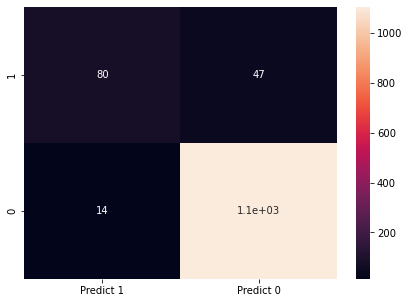

In [237]:
cm=metrics.confusion_matrix(Y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)


In [238]:
print(classification_report(Y_test,y_predict))


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1118
         1.0       0.85      0.63      0.72       127

    accuracy                           0.95      1245
   macro avg       0.91      0.81      0.85      1245
weighted avg       0.95      0.95      0.95      1245



In [185]:
print("This model has a very good precision,recall and F1-score on the test data.")
print("But as most of the data here seems to be with class-0.")

This model has a very good precision,recall and F1-score on the test data.
But as most of the data here seems to be with class-0.


###  E.  Balance the data using the right balancing technique.

class_0: (4500, 12)
class_1: (480, 12)
total class 1 and 0: 
 0.0    480
1.0    480
Name: LoanOnCard, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

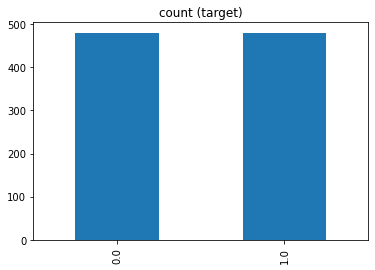

In [192]:
# Getting the class counts to balance the data
class_count_0, class_count_1 = Consolidated_data_df['LoanOnCard'].value_counts()

# Separate class
class_0 = Consolidated_data_df[Consolidated_data_df['LoanOnCard'] == 0]
class_1 = Consolidated_data_df[Consolidated_data_df['LoanOnCard'] == 1]
print('class_0:', class_0.shape)#more samples belong to class_0 4500
print('class_1:', class_1.shape)#no of sample in this class are 480

#There is imbalance in data using Undersampling to balance the data by sampling only 480 samples from class_0.

class_0_under = class_0.sample(class_count_1)

balancedtest_under = pd.concat([class_0_under, class_1], axis=0)#new balanced dataset with 480 records of each class

print("total class 1 and 0: \n",balancedtest_under['LoanOnCard'].value_counts())# plot the count after under-sampeling
balancedtest_under['LoanOnCard'].value_counts().plot(kind='bar', title='count (target)')


###  F.  Again train the same previous model on balanced data.

In [194]:
#Training the model on the balanced data using undersampling.

X_bal_df = balancedtest_under.drop(labels= "LoanOnCard" , axis = 1)
Y_bal_df = balancedtest_under["LoanOnCard"]

X_train_bf, X_test_bf, Y_train_bf, Y_test_bf = train_test_split(X_bal_df, Y_bal_df, test_size=0.25, random_state=1)

# Fit the model on train
logreg_new = LogisticRegression(random_state=1,max_iter=10000)
logreg_new.fit(X_bal_df, Y_bal_df)
#predict on test
y_predict_new = logreg.predict(X_test_bf)

model_score = logreg.score(X_test_bf, Y_test_bf)
print(model_score)


0.7791666666666667


In [212]:
print(X_bal_df.shape)
print(Y_bal_df.shape)

(960, 11)
(960,)


###  G.  Print evaluation metrics and clearly share differences observed.

<AxesSubplot:>

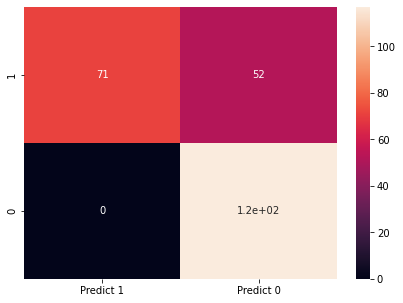

In [188]:
cm=metrics.confusion_matrix(Y_test_bf, y_predict_new, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [197]:
print(classification_report(Y_test_bf,y_predict_new))

              precision    recall  f1-score   support

         0.0       0.69      0.99      0.81       117
         1.0       0.99      0.58      0.73       123

    accuracy                           0.78       240
   macro avg       0.84      0.78      0.77       240
weighted avg       0.84      0.78      0.77       240



In [195]:
#Observation: Since the data was biased in before the balancing using undersampling technique, accuracy was high 
#but it is not useful for predicting the test data. 
#Score for Model on original data -.95.100
#Balanced model has a less score than the original dataset based model, but it is likely to perform well on test data 
#without the data bias.
#Score for balanced Model on modified data -.77.91

# 3. Performance Improvement:


###  A. Train a base model each for SVM, KNN.

In [ ]:
### Training SVM

In [218]:

# Shape and size of data
print("Training data size\n",X_train_bf.shape,Y_train_bf.shape)
print("\nTesting data size\n",X_test_bf.shape,Y_test_bf.shape)

Training data size
 (720, 11) (720,)

Testing data size
 (240, 11) (240,)


In [223]:
# Building a Support Vector Machine on train data with kernel ="rbf"
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_bf, Y_train_bf)
prediction = svc_model.predict(X_test_bf)

print(svc_model.score(X_train_bf, Y_train_bf))
print(svc_model.score(X_test_bf, Y_test_bf))

print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test_bf))


0.9083333333333333
0.9125
Confusion Matrix:
 [[107  11]
 [ 10 112]]


In [224]:

# Building a Support Vector Machine on train data with kernel ="rbf"
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train_bf, Y_train_bf)
prediction = svc_model .predict(X_test_bf)

print(svc_model.score(X_train_bf, Y_train_bf))
print(svc_model.score(X_test_bf, Y_test_bf))

print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test_bf))


0.8708333333333333
0.875
Confusion Matrix:
 [[ 97  10]
 [ 20 113]]


In [225]:

# Building a Support Vector Machine on train data with kernel ="sigmoid"
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train_bf, Y_train_bf)
prediction = svc_model .predict(X_test_bf)

print(svc_model.score(X_train_bf, Y_train_bf))
print(svc_model.score(X_test_bf, Y_test_bf))

print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test_bf))


0.6680555555555555
0.7083333333333334
Confusion Matrix:
 [[85 38]
 [32 85]]


In [227]:
print("SVM with linear kernel function is selected as base model with test score 91.25% )")

SVM with linear kernel function is selected as base model with test score 91.25% )


In [ ]:
### KNN MODEL 

In [229]:

# Shape and size of data
print("Training data size\n",X_train_bf.shape,Y_train_bf.shape)
print("\nTesting data size\n",X_test_bf.shape,Y_test_bf.shape)

Training data size
 (720, 11) (720,)

Testing data size
 (240, 11) (240,)


In [230]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
# Call Nearest Neighbour algorithm
NNH.fit(X_train_bf, Y_train_bf)

predicted_labels = NNH.predict(X_test_bf)

# evaluate accuracy
print(accuracy_score(Y_test_bf, predicted_labels))




0.8666666666666667


###  B. Tune parameters for each of the models wherever required and finalize a model

In [ ]:
### Tuning KNN with k values

In [231]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
# Call Nearest Neighbour algorithm
NNH.fit(X_train_bf, Y_train_bf)

predicted_labels = NNH.predict(X_test_bf)

# evaluate accuracy
print(accuracy_score(Y_test_bf, predicted_labels))



0.8583333333333333


In [267]:
NNH = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
# Call Nearest Neighbour algorithm
NNH.fit(X_train_bf, Y_train_bf)

predicted_labels = NNH.predict(X_test_bf)

# evaluate accuracy
print(accuracy_score(Y_test_bf, predicted_labels))


0.875


In [270]:
NNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )
# Call Nearest Neighbour algorithm
NNH.fit(X_train_bf, Y_train_bf)

predicted_labels = NNH.predict(X_test_bf)

# evaluate accuracy
print(accuracy_score(Y_test_bf, predicted_labels))

0.875


In [281]:
print("Accuracy scores:(for k=5: 86.66%) , (for k=3:85.83%), (for k=7:87.5%) and (for k=9:87.5%).")
print("Either of the models can be used,we prefer k=7 less computation overhead and maximum accuracy.")

Accuracy scores:(for k=5: 86.66%) , (for k=3:85.83%), (for k=7:87.5%) and (for k=9:87.5%).
Either of the models can be used,we prefer k=7 less computation overhead and maximum accuracy.


In [ ]:
### Tuning SVM with C and Gamma values

In [243]:
#Tuning from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .001, kernel='linear', gamma= 1)
svc_model.fit(X_train_bf, Y_train_bf)

prediction = svc_model.predict(X_test_bf)

print(svc_model.score(X_train_bf, Y_train_bf))
print(svc_model.score(X_test_bf, Y_test_bf))


0.8791666666666667
0.8833333333333333


In [249]:

# Building a Support Vector Machine on train data
svc_model = SVC(C= .01, kernel='linear', gamma= 10)
svc_model.fit(X_train_bf, Y_train_bf)

prediction = svc_model.predict(X_test_bf)

print(svc_model.score(X_train_bf, Y_train_bf))
print(svc_model.score(X_test_bf, Y_test_bf))


0.8944444444444445
0.9


In [250]:

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 10)
svc_model.fit(X_train_bf, Y_train_bf)

prediction = svc_model.predict(X_test_bf)

print(svc_model.score(X_train_bf, Y_train_bf))
print(svc_model.score(X_test_bf, Y_test_bf))

0.8958333333333334
0.9125


In [248]:

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 100)
svc_model.fit(X_train_bf, Y_train_bf)

prediction = svc_model.predict(X_test_bf)

print(svc_model.score(X_train_bf, Y_train_bf))
print(svc_model.score(X_test_bf, Y_test_bf))


0.8958333333333334
0.9125


In [254]:
print("Tuning the parameters c and gamma,we found c=.1 and gamma=10 are producing optimal result on test data.91.25")
print("Parameters tried c=.01,c=.001 and gamma= 1,10,100")

Tuning the parameters c and gamma,we found c=.1 and gamma=10 are producing optimal result on test data.91.25
Parameters tried c=.01,c=.001 and gamma= 1,10,100


###  C.  Print evaluation metrics for final models

0.8958333333333334
0.9125


<AxesSubplot:>

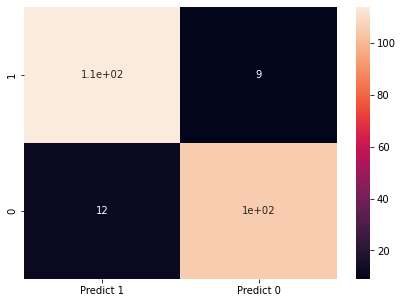

In [282]:

# Building a final Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 10)
svc_model.fit(X_train_bf, Y_train_bf)

prediction = svc_model .predict(X_test_bf)

print(svc_model.score(X_train_bf, Y_train_bf))
print(svc_model.score(X_test_bf, Y_test_bf))


cm=metrics.confusion_matrix(Y_test_bf, prediction, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)



In [283]:
print(classification_report(Y_test_bf,prediction))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       117
         1.0       0.90      0.93      0.92       123

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240



In [ ]:
# Building a final KNN model on train data

In [285]:

NNH = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
# Call Nearest Neighbour algorithm
NNH.fit(X_train_bf, Y_train_bf)

predicted_labels = NNH.predict(X_test_bf)

# evaluate accuracy
print(accuracy_score(Y_test_bf, predicted_labels))

0.875


<AxesSubplot:>

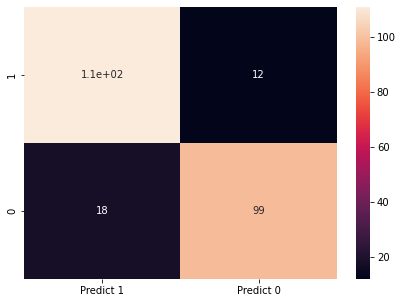

In [286]:
#printing the confusion matrix
cm=metrics.confusion_matrix(Y_test_bf, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [287]:
print(classification_report(Y_test_bf,predicted_labels))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       117
         1.0       0.86      0.90      0.88       123

    accuracy                           0.88       240
   macro avg       0.88      0.87      0.87       240
weighted avg       0.88      0.88      0.87       240



###  D.  Share improvement achieved from base model to final model

In [290]:
print("SVC tuning observations found:\n")
print("Tuning the parameters c and gamma,we found c=.1 and gamma=10 are producing maximun accuracy(test data) of 91.25%.")
print("Other parameters tried c=.01,c=.001 and gamma=10,gamma=100,resulted in less than above accuracy of c=.1 and gamma=10.")

print("\n")
print("/*************************************************************************************************************/")
print("/*************************************************************************************************************/")
print("\n")
print("KNN tuning Observations found:\n")
print("The accuracy score is around 85% to 87.5% with K=3,5,7,9.")
print("Either of the models can be used we prefer k=7 since it has less computation overhead and maximum accuracy.")

SVC tuning observations found:

Tuning the parameters c and gamma,we found c=.1 and gamma=10 are producing maximun accuracy(test data) of 91.25%.
Other parameters tried c=.01,c=.001 and gamma=10,gamma=100,resulted in less than above accuracy of c=.1 and gamma=10.


/*************************************************************************************************************/
/*************************************************************************************************************/


KNN tuning Observations found:

The accuracy score is around 85% to 87.5% with K=3,5,7,9.
Either of the models can be used we prefer k=7 since it has less computation overhead and maximum accuracy.
